# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

<strong style="color:#F00">
Grade: 32/40

* combine back-to-back loops
* don't hardcode numbers (e.g., why 24?)
* avoid explicit indexing in for-loops
* use vectorized operations instead of looping over data frame rows
</strong>

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import glob

In [2]:
indir = "/Users/lizhihao/Desktop/assignment3_data/fruit/*.xlsx"
import os
import glob
import pandas as pd

files = glob.glob(indir)
dfs = {}
dat = []
result = []
e  = []
for f in files:
    dfs = pd.read_excel(f)
    dat.append(dfs)
dat[22] = dat[22].drop(["Unnamed: 7","Unnamed: 8"],axis=1)
food = [os.path.splitext(os.path.basename(fn))[0] for fn in files]
for i in range(0,29):
    dat[i].columns = ["form","price_per_lb","a","yield","lb_per_cup","b","price_per_cup"]
    dat[i] = dat[i].drop(["a","b"],axis=1)
    for j in range(0,dat[i].shape[0]):
        if dat[i]["form"].str.startswith('Fresh')[j]==True:
            dat[i]["food"] = food[i]
            e = dat[i][2:3]
            result.append(e)
                
d = []
for i in range(0,24):
    c = "Fruit"
    d.append(c)

result = pd.concat(result)
result["type"] = d
result

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
2,Fresh1,1.56752,0.9,0.242508,0.422373,apples,Fruit
2,Fresh1,3.04007,0.93,0.363763,1.1891,apricots,Fruit
2,Fresh1,0.566983,0.64,0.330693,0.292965,bananas,Fruit
2,Fresh1,5.77471,0.96,0.31967,1.92292,blackberries,Fruit
2,Fresh1,4.73462,0.95,0.31967,1.59318,blueberries,Fruit
2,Fresh1,0.535874,0.51,0.374786,0.3938,cantaloupe,Fruit
2,Fresh1,3.59299,0.92,0.341717,1.33455,cherries,Fruit
2,Fresh1,0.897802,0.49,0.462971,0.848278,grapefruit,Fruit
2,Fresh1,2.09383,0.96,0.330693,0.721266,grapes,Fruit
2,Fresh1,0.796656,0.46,0.374786,0.649077,honeydew,Fruit


<strong style="color:#F00">
Grade: 8/10

* DRY (write funcs)
</strong>

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [10]:
indir = "/Users/lizhihao/Desktop/assignment3_data/vegetables/*.xlsx"
import os
import glob
import pandas as pd

files = glob.glob(indir)
dfs = {}
dat1 = []
result2 = []
a = []
b = []
c = []
for f in files:
    dfs = pd.read_excel(f)
    dat1.append(dfs)
dat1[19] = dat1[19].drop(["Unnamed: 7","Unnamed: 8"],axis=1)
food1 = [os.path.splitext(os.path.basename(fn))[0] for fn in files]
for i in range(0,44):
    dat1[i].columns = ["form","price_per_lb","a","yield","lb_per_cup","b","price_per_cup"]
    dat1[i] = dat1[i].drop(["a","b"],axis=1)
    for j in range(0,dat1[i].shape[0]):
        if dat1[i]["form"].str.startswith('Fresh')[j]==True:
            dat1[i]["food"] = food1[i]
            e = dat1[i][2:3]
            result2.append(e)
d = []
for i in range(0,33):
    c = "vegetables"
    d.append(c)
result2 = pd.concat(result2)
result2["type"] = d
result2

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
2,Fresh1,1.17225,0.458554,0.451948,1.15536,acorn_squash,vegetables
2,Fresh1,2.21305,0.375309,0.385809,2.27497,artichoke,vegetables
2,Fresh1,3.21349,0.493835,0.396832,2.58227,asparagus,vegetables
2,Fresh1,2.23587,0.740753,0.31967,0.964886,avocados,vegetables
2,Fresh,,,,NaN,broccoli,vegetables
2,Fresh1,2.76355,1.06,0.341717,0.890898,brussels_sprouts,vegetables
2,Fresh1,1.24474,0.714,0.451948,0.787893,butternut_squash,vegetables
2,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,cabbage,vegetables
2,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,cabbage,vegetables
2,Fresh,NaN,NaN,NaN,NaN,carrots,vegetables


The result of tomatoes is not correct.Since in the dataset, tomatoes seems not apear. However, the xlxs shows that the tomatoes has several type of "fresh"
The reason is that the first row of tomatoe is fresh but not fresh1.
Broccoli,cabbage,carrot,cauliflower,celery,cucumber,lettuce_Romaine,Mushrooms and spinach also have these problems.

<strong style="color:#F00">
Grade: 8/10

* numeric cols?
</strong>

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [11]:
result2 = result2.dropna()
frame  = [result,result2]
Final = pd.concat(frame)
Final

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
2,Fresh1,1.56752,0.9,0.242508,0.422373,apples,Fruit
2,Fresh1,3.04007,0.93,0.363763,1.1891,apricots,Fruit
2,Fresh1,0.566983,0.64,0.330693,0.292965,bananas,Fruit
2,Fresh1,5.77471,0.96,0.31967,1.92292,blackberries,Fruit
2,Fresh1,4.73462,0.95,0.31967,1.59318,blueberries,Fruit
2,Fresh1,0.535874,0.51,0.374786,0.3938,cantaloupe,Fruit
2,Fresh1,3.59299,0.92,0.341717,1.33455,cherries,Fruit
2,Fresh1,0.897802,0.49,0.462971,0.848278,grapefruit,Fruit
2,Fresh1,2.09383,0.96,0.330693,0.721266,grapes,Fruit
2,Fresh1,0.796656,0.46,0.374786,0.649077,honeydew,Fruit


<strong style="color:#F00">
Grade: 34/40

* price distrib incorrect
* Q4 lineplot would be better as a bar/dot plot
</strong>

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

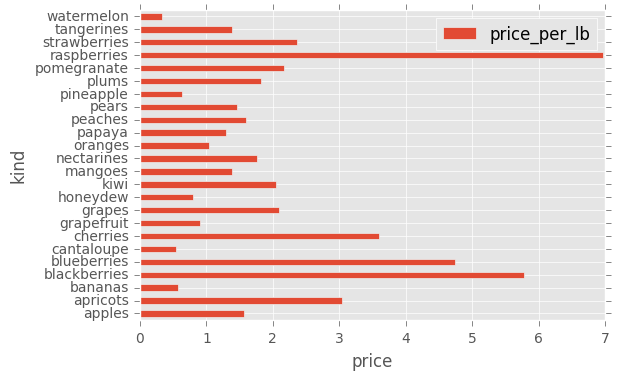

In [7]:
#Problem 1
result.plot(x = 'food',y = 'price_per_lb',kind = 'barh')
plt.xlabel('price')
plt.ylabel('kind')
plt.show()

The plot shows that raspberries is the most expensive and the watermelon is the least expensive.


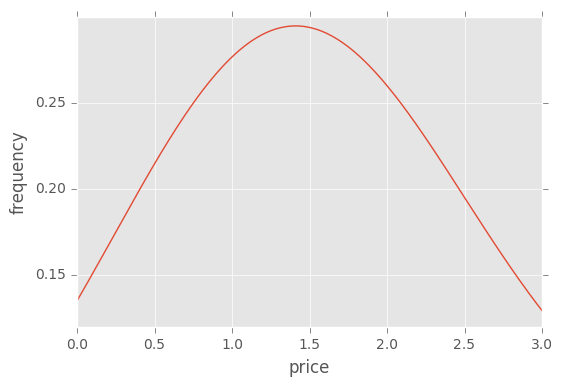

In [8]:
##problem 2
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
plot_1 = list(result["price_per_lb"])
density = gaussian_kde(plot_1)
xs = np.linspace(0,3,300)
plt.plot(xs,density(xs))
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [9]:
plot_1 = list(result1["price_per_lb"])
density = gaussian_kde(plot_1)
xs = np.linspace(0,3,300)
plt.plot(xs,density(xs))
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

NameError: name 'result1' is not defined

The distribution of the fruit shows that the distribution has a peak at aproximate 1.3. Moreover, the plot is roughly bell shaped.
The distribution of the vegetables shows that the distribution has two peaks and one valley, which implies the distribution is bimodality

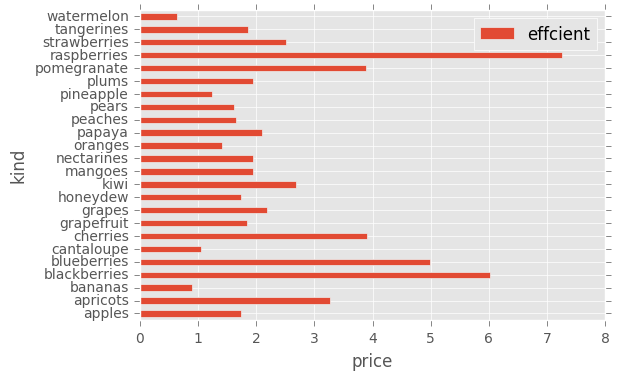

In [180]:
#problem 3
result["effcient"] = result["price_per_lb"]/result["yield"]
result.plot(x = 'food',y = 'effcient',kind = 'barh')
plt.xlabel('price')
plt.ylabel('kind')
plt.show()


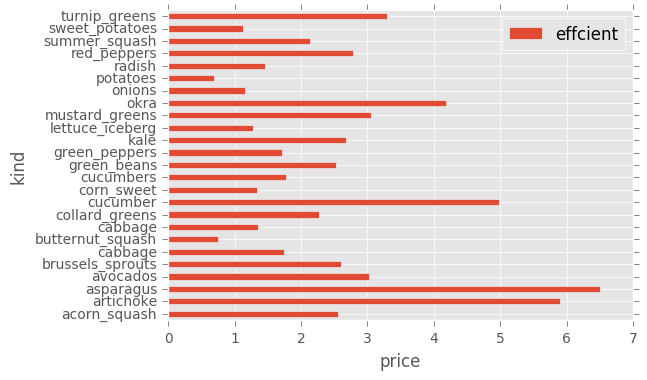

In [181]:
result1["effcient"] = result1["price_per_lb"]/result1["yield"]
result1.plot(x = 'food',y = 'effcient',kind = 'barh')
plt.xlabel('price')
plt.ylabel('kind')
plt.xlim(0,7)
plt.show()

From the bar plot, we can clearly knows that watermelon has the best value for the price of fruit since it has the least price for 1 yield and the potatoes have the best value for the price of vegetable.
However, in total, watermelon has the best value for price

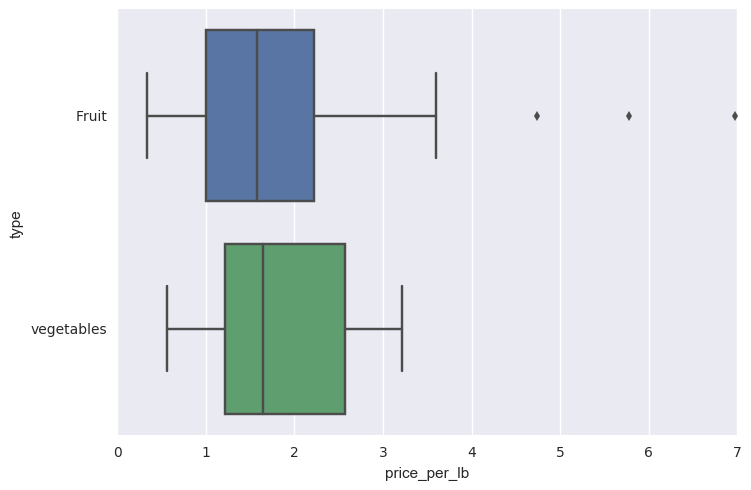

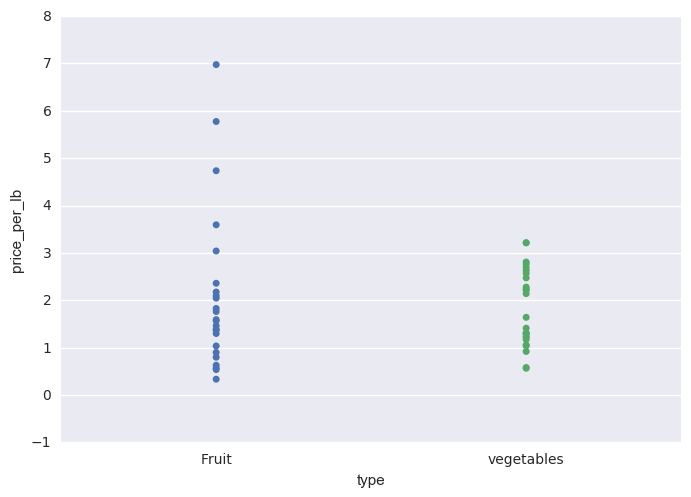

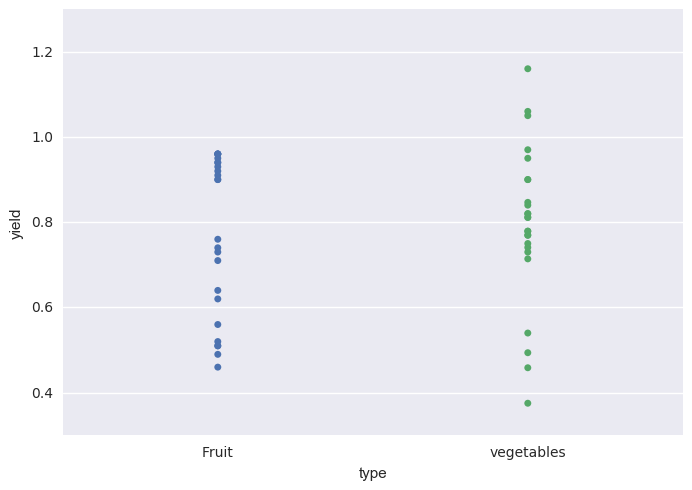

In [182]:
#problem 4
import seaborn as sns
Final["diff"] = Final['price_per_cup']/Final['lb_per_cup']-Final['price_per_lb']

sns.boxplot("price_per_lb",'type',data = Final)
plt.show()
sns.stripplot(x = 'type',y  = 'price_per_lb',data = Final)
plt.show()
sns.stripplot(x = 'type',y  = 'yield',data = Final)
plt.show()

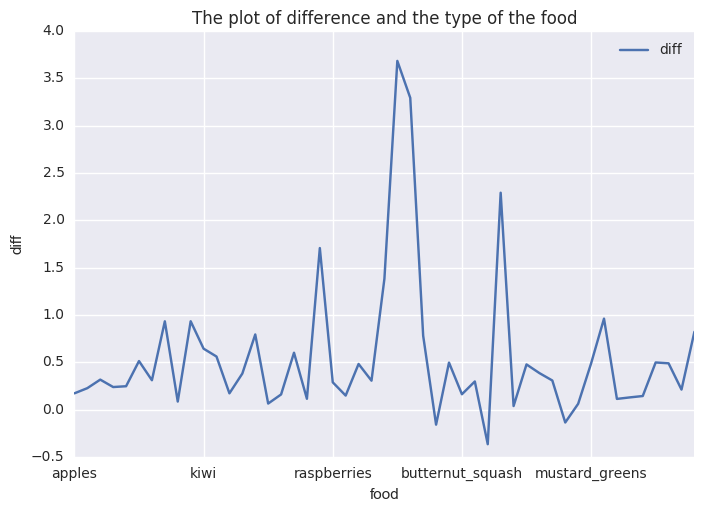

In [183]:
Final.plot(x = 'food',y = 'diff',kind = 'line')
plt.xlabel('food')
plt.ylabel('diff')
plt.title('The plot of difference and the type of the food')
plt.show()

There are some interesting findings according to these plots. We find out that the price of the fruits are normally distributed and hae some outliers according to the box plot, which implies that some price of the fruits are extremely high. However, the vegetables do not have outliers. The median of these two categories are quite similar. 
As for the yield part, we find out that the distribution of the vegetables is disperse but the distribution of the fruits is quite concntrate.
Moreover,we also find out that there exists some differences between  price_per_cup/lb_per_cup - price_per_lb, which shows in the last plot.

Problem 5

Acording to the plot problem 3, we find out that watermelon has the best combination for yield and price. For 1 yield, the price is the least  and it is well known that we can get more nutrition if we can eat more fruit. 
We also known that watermelon has many useful nutrition such as , so we many assume watermelon provides the best combination of price, yield, and nutrition